The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


Import libraries and data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

profiles = pd.read_csv("profiles.csv")
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

`profiles` has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning.


## Investigate the data

In [35]:
#lets get all the columns in the dataframe
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [36]:
#Investigate the first 3 rows
profiles.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


### Age

In [37]:
#Lets see the range of ages, who's the yooungest and the oldest
print("The youngest: ", np.min(profiles.age))
print("The oldest: ", np.max(profiles.age))

The youngest:  18
The oldest:  110


this is definetely a mistake, there is no way someone can be 110 years old, lets investigate this row

In [38]:
print(profiles[profiles.age == 110])

      age body_type diet drinks drugs education essay0 essay1 essay2 essay3  \
2512  110       NaN  NaN    NaN   NaN       NaN    NaN    NaN    NaN    NaN   

      ...               location offspring orientation pets religion sex sign  \
2512  ...  daly city, california       NaN    straight  NaN      NaN   f  NaN   

      smokes   speaks  status  
2512     NaN  english  single  

[1 rows x 31 columns]


Yeah, it does look fake, lets looks at the distributions.

In [39]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


Text(0.5, -0.1, 'Data is right skewed')

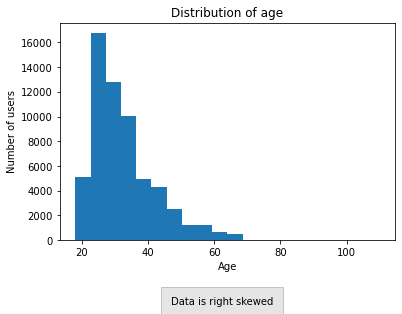

In [40]:
#Plot histogram
plt.hist(profiles.age, bins=20)
plt.title("Distribution of age")
plt.ylabel("Number of users")
plt.xlabel("Age")
plt.figtext(0.5, -0.1, "Data is right skewed", ha="center", fontsize=10, bbox={"facecolor":"grey", "alpha":0.2, "pad":10})

In [41]:
print((profiles[profiles["age"] >= 70]))


       age body_type          diet drinks  drugs                   education  \
2512   110       NaN           NaN    NaN    NaN                         NaN   
25324  109  athletic  mostly other    NaN  never  working on masters program   

      essay0 essay1 essay2   essay3  ...                   location  \
2512     NaN    NaN    NaN      NaN  ...      daly city, california   
25324    NaN    NaN    NaN  nothing  ...  san francisco, california   

             offspring orientation pets                             religion  \
2512               NaN    straight  NaN                                  NaN   
25324  might want kids    straight  NaN  other and somewhat serious about it   

      sex                                  sign         smokes  \
2512    f                                   NaN            NaN   
25324   m  aquarius but it doesn&rsquo;t matter  when drinking   

               speaks     status  
2512          english     single  
25324  english (okay)  available  


In [42]:
over60 = profiles.apply(lambda x: True if x["age"] >= 60 else False, axis=1)
num_rows = len(over60[over60 == True].index)
print('Number ofPeople older than 60 : ',
      num_rows)

Number ofPeople older than 60 :  1161


In [43]:
#create categories for ages
category = pd.cut(profiles['age'], bins=[18, 20, 30, 40, 50, 60, 70],
right=False, labels=["+18", "20_30", "30_40", "40_50", "50_60", "over70"])
profiles.insert(2, "Age_group", category)
profiles.head(3)

,age,body_type,Age_group,diet,drinks,drugs,education,essay0,essay1,essay2,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,20_30,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,30_40,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,30_40,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


20_30     0.464101
30_40     0.331065
40_50     0.122410
50_60     0.047710
over70    0.019334
+18       0.015347
NaN       0.000033
Name: Age_group, dtype: float64

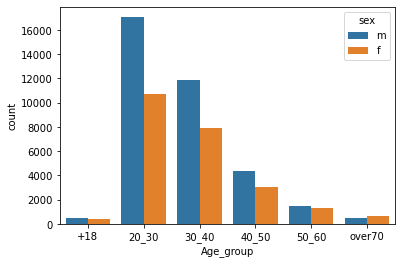

In [49]:
## Plot distributions of age groups.
sns.countplot(profiles["Age_group"], hue=profiles["sex"])
profiles["Age_group"].value_counts(normalize=True, dropna=False)

### Orientation

Text(0.5, 1.0, 'Orientation')

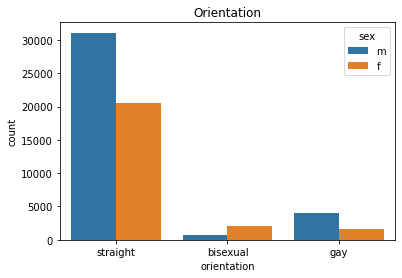

In [48]:
profiles["orientation"].value_counts(normalize=True, dropna=False)
sns.countplot(profiles["orientation"], hue=profiles["sex"])
plt.title("Orientation")